In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

In [ ]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

In [3]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

In [4]:
hcareas = ['CA','DG']

hc_sessions = []
for i in np.arange(len(sessions.structure_acronyms)):
    sessionid = sessions.structure_acronyms.index[i]
    if any(elem in sessions.structure_acronyms[sessionid] for elem in hcareas):
        hc_sessions.append(sessionid)
        
# for i, sesh in enumerate(hc_sessions):
#     print(sessions.structure_acronyms[sesh])

In [5]:
hc_sessions_info = sessions[sessions.index == hc_sessions]

In [6]:
allunits = cache.get_units(hc_sessions)

In [7]:
channelinfo = cache.get_channels()

In [8]:
probeinfo = cache.get_probes()

In [9]:
ca_channelinfo = channelinfo[channelinfo.manual_structure_acronym == "CA"]
ca_units = allunits[allunits.peak_channel_id.isin(ca_channelinfo.index)]

In [10]:
ca_channelinfo.head()

,ecephys_probe_id,local_index,probe_vertical_position,probe_horizontal_position,manual_structure_id,manual_structure_acronym,unit_count
id,,,,,,,
849721922,769322785,101,1020.0,11.0,375.0,CA,2
849721986,769322785,133,1340.0,11.0,375.0,CA,1
849721988,769322785,134,1360.0,59.0,375.0,CA,1
849722008,769322785,144,1460.0,43.0,375.0,CA,1
849722010,769322785,145,1460.0,11.0,375.0,CA,5


In [11]:
dg_channelinfo = channelinfo[channelinfo.manual_structure_acronym == "DG"]
dg_units = allunits[allunits.peak_channel_id.isin(dg_channelinfo.index)]

In [12]:
sessionid = sessions.index[0]
session_info = cache.get_session_data(sessionid)
probeid = session_info.probes.index[0]

In [13]:
probe_lfp = session_info.get_lfp(probeid)

In [ ]:
ca_channels_lfp = probe_lfp.loc[dict(channel=probe_lfp.channel.isin(ca_channelinfo.index))]

In [ ]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20,10))
for i in range(2):
    plt.plot(ca_channels_lfp.values[:,i]+i*np.max(ca_channels_lfp.values[:,i]))
#plt.imshow(ca_channels_lfp.values, aspect='auto')

#colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
#for c, stim_name in enumerate(session_info.stimulus_names):
#    stim = stimulus_epochs[stimulus_epochs.stimulus_name==stim_name]
#    for j in range(len(stim)):
#        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)


In [55]:
t = ca_channels_lfp.time.values
v1 = ca_channels_lfp.values[:, 0]
v2 = ca_channels_lfp.values[:, 1]

In [56]:
import scipy.signal
freq_window = (3, 12)
filt_order = 3
fs = 1/(t[1]-t[0])
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v1_theta = scipy.signal.lfilter(b, a, v1)
v2_theta = scipy.signal.lfilter(b, a, v2)

In [43]:
np.corrcoef(v_theta[:, 0], v_theta[:, 1])

array([[1.        , 0.99819444],
       [0.99819444, 1.        ]])

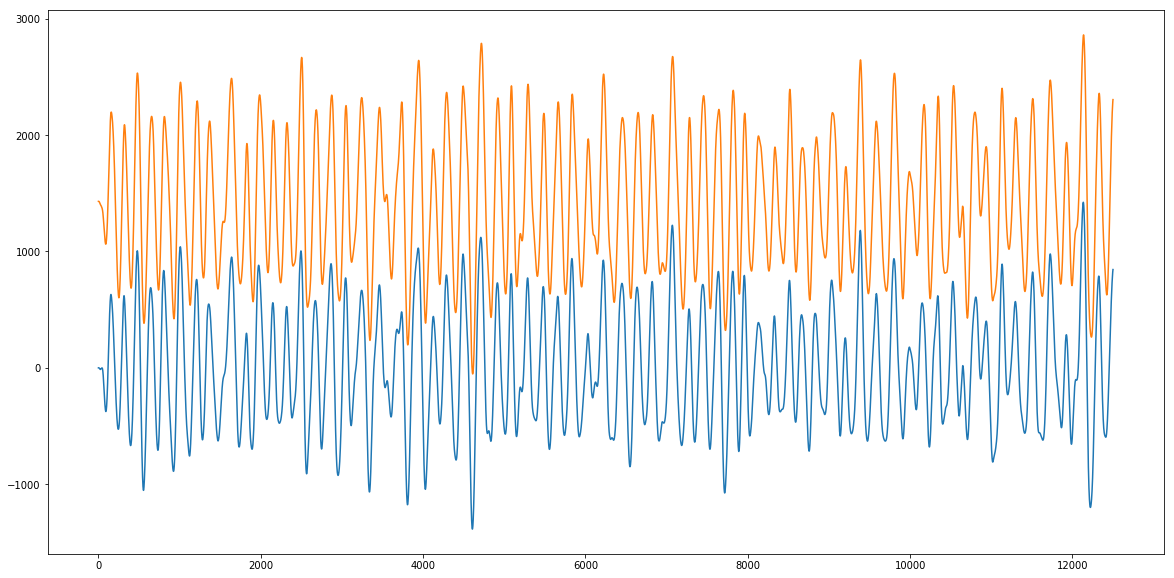

In [61]:
plt.figure(figsize=(20,10))
plt.plot(v1_theta[:12500])
plt.plot(v2_theta[:12500]+np.max(v2_theta[:12500]))
